In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import datasets, linear_model, metrics

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
#from sklearnex import patch_sklearn

pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [2]:
# Params
params = {'n_estimators': 500,
          'max_depth': 5,
          'min_samples_split': 5,
          'learning_rate': 0.15,
          'loss': 'ls'}

#patch_sklearn()

In [543]:
# # Params
# params = {'n_estimators': 500,
#           'max_depth': 5,
#           'min_samples_split': 5,
#           'learning_rate': 0.15,
#           'loss': 'lad'}

# #patch_sklearn()

In [544]:
def convert(df: pd.DataFrame, frame_size=10):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x

In [ ]:
data_dir = Path("./50cm") 
df1 = pd.read_csv(data_dir / "fft_50_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df1 = df1[df1['frequency'] != "clocktime"]
df1 = df1.dropna()
print(df1[120:130])
df1 = convert(df1)
# df36 = df36[:129*198]

df2 = pd.read_csv(data_dir / "fft_50_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = df2[df2['frequency'] != "clocktime"]
df2 = df2.dropna()
df2 = convert(df2)

df3 = pd.read_csv(data_dir / "fft_50_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = df3[df3['frequency'] != "clocktime"]
df3 = df3.dropna()
df3 = convert(df3)


data_dir = Path("./1m") 
df4 = pd.read_csv(data_dir / "fft_100_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = df4[df4['frequency'] != "clocktime"]
df4 = df4.dropna()
df4 = convert(df4)

# df36 = df36[:129*198]

df5 = pd.read_csv(data_dir / "fft_100_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = df5[df5['frequency'] != "clocktime"]
df5 = df5.dropna()
df5 = convert(df5)


df6 = pd.read_csv(data_dir / "fft_100_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df6 = df6[df6['frequency'] != "clocktime"]
df6 = df6.dropna()
df6 = convert(df6)


data_dir = Path("./1.5m") 
df7 = pd.read_csv(data_dir / "fft_150_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df7 = df7[df7['frequency'] != "clocktime"]
df7 = df7.dropna()
df7 = convert(df7)


data_dir = Path("./1.5m") 
df8 = pd.read_csv(data_dir / "fft_150_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df8 = df8[df8['frequency'] != "clocktime"]
df8 = df8.dropna()
df8 = convert(df8)


data_dir = Path("./1.5m") 
df9 = pd.read_csv(data_dir / "fft_150_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df9 = df9[df9['frequency'] != "clocktime"]
df9 = df9.dropna()
df9 = convert(df9)


data_dir = Path("./SideVent") 
df10 = pd.read_csv(data_dir / "fft_0_0_SideVent_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = df10[df10['frequency'] != "clocktime"]
df10 = df10.dropna()
df10 = convert(df10)

#PHONE 2 DATA
data_dir = Path("./DiverseDataFromPhone2") 
df11 = pd.read_csv(data_dir / "fft1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df11 = df11[df11['frequency'] != "clocktime"]
df11 = df11.dropna()

df12 = pd.read_csv(data_dir / "fft2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df12 = df12[df12['frequency'] != "clocktime"]
df12 = df12.dropna()

df13 = pd.read_csv(data_dir / "fft3.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df13 = df13[df13['frequency'] != "clocktime"]
df13 = df13.dropna()

df14 = pd.read_csv(data_dir / "fft4.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df14 = df14[df14['frequency'] != "clocktime"]
df14 = df14.dropna()

df15 = pd.read_csv(data_dir / "fft5.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df15 = df15[df15['frequency'] != "clocktime"]
df15 = df15.dropna()

# df3 = pd.read_csv(data_dir / "fft_100_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df3 = df3[df3['frequency'] != "clocktime"]
# df3 = df3.dropna()

# data_dir = Path("./") 
# dfX = pd.read_csv(data_dir / "fft_NoAirflowTest.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# dfX = dfX[dfX['frequency'] != "clocktime"]
# dfX = dfX.dropna()

In [547]:
def indices(df):
#     return np.random.choice(df.shape[0], size=2000, replace=False, p=None)
    return df[:2000]

# df1 = df1[indices(df1), :]
# df2 = df2[indices(df2), :]
# df3 = df3[indices(df3), :]
# df4 = df4[indices(df4), :]
# df5 = df5[indices(df5), :]
# df6 = df6[indices(df6), :]
# df7 = df7[indices(df7), :]
# df8 = df8[indices(df8), :]
# df9 = df9[indices(df9), :]
# df10 = df10[indices(df10), :]

df1 = indices(df1)
df2 = indices(df2)
df3 = indices(df3)
df4 = indices(df4)
df5 = indices(df5)
df6 = indices(df6)
df7 = indices(df7)
df8 = indices(df8)
df9 = indices(df9)
df10 = indices(df10)




In [548]:
print(df1.shape)
print(df1[0:5])

(2000, 10)
[[ 28.      71.7615  94.0179  68.3578  60.9262  52.1582  44.279   54.2679
    4.       4.58  ]
 [120.     168.4581  33.5244  72.7755  62.2254  55.4052  31.4343  27.5656
    0.       4.77  ]
 [ 90.     147.4408 149.0217  73.5421  70.4557  33.4743  28.7149  22.7208
   30.       4.06  ]
 [ 16.      66.3187 170.2415  65.8408  16.      28.9451  47.7684  41.5332
   32.       3.9   ]
 [196.      52.5763 107.4811  12.5971  51.225   30.8603  31.746   32.9347
   28.       3.36  ]]


In [549]:
print(df4.shape)
print(df1[0:5])

(2000, 10)
[[ 28.      71.7615  94.0179  68.3578  60.9262  52.1582  44.279   54.2679
    4.       4.58  ]
 [120.     168.4581  33.5244  72.7755  62.2254  55.4052  31.4343  27.5656
    0.       4.77  ]
 [ 90.     147.4408 149.0217  73.5421  70.4557  33.4743  28.7149  22.7208
   30.       4.06  ]
 [ 16.      66.3187 170.2415  65.8408  16.      28.9451  47.7684  41.5332
   32.       3.9   ]
 [196.      52.5763 107.4811  12.5971  51.225   30.8603  31.746   32.9347
   28.       3.36  ]]


In [550]:
df = np.concatenate([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=0)
# df = df10

#df = df1.append([df4])
print(df.shape)

(20000, 10)


In [551]:
# New change
np.random.shuffle(df)
print(df.shape)

(20000, 10)


In [552]:
# data_mid = convert(df)

# data_mid = data_mid[data_mid[:, 9].argsort()]  # sort by day
# data_mid.shape

In [553]:
# indices = np.random.choice(np.arange(data_mid.shape[0]), size=10000, replace=False, p=None)
# indice2 = np.concatenate([indices, np.random.choice(np.arange(6000), size=4000, replace=False, p=None)])
# indice3 = np.concatenate([indice2, np.random.choice(np.arange(data_mid.shape[0]-6000, data_mid.shape[0]), size=4000, replace=False, p=None)])
# data = data_mid[indice3, :]


In [554]:
data = df

In [555]:
X = data[:,:-1]

X = X[:, :8]
X.shape

(20000, 8)

In [556]:
X

array([[608.    , 389.8867, 308.6129, ...,  54.4022,  41.6425,  39.5505],
       [186.    ,  90.5653,  31.1587, ...,  17.703 ,  34.5997,  26.4469],
       [186.    , 123.5777,  21.2737, ...,  29.3166,  18.4237,  16.1464],
       ...,
       [ 88.    ,  85.8402,  56.4885, ...,   8.3598,   7.5532,  24.3819],
       [226.    , 100.8952,  45.8939, ...,   7.0881,  29.3555,  27.0225],
       [  4.    ,  63.6175,  70.9641, ...,  47.8024,  32.804 ,  12.4549]])

In [557]:
y = data[:, -1]
y.shape


(20000,)

In [558]:
y

array([29.42,  4.32,  5.25, ...,  6.19,  4.49,  3.01])

In [559]:
print (X.shape, y.shape)

(20000, 8) (20000,)


In [560]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [561]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.15, max_depth=5, min_samples_split=5,
                          n_estimators=500)

In [562]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [563]:
print(y_pred[:5])
print(y_test[:5])

[4.14626689 4.17979146 3.48070883 4.10123192 4.03165209]
[2.69 4.86 2.75 4.23 5.35]


In [564]:
print(y_train_pred[:5])
print(y_train[:5])

[4.79835021 4.50299062 4.23071238 3.98651521 3.94865356]
[4.77 5.65 3.98 4.06 3.74]


In [565]:
print("MSE of test: ", mean_squared_error(y_test, y_pred))
print(y_pred.shape)

print("Test Reg score: ", reg.score(X_test, y_test))
    

MSE of test:  3.1365178964142366
(4000,)
Test Reg score:  0.9427638654441138


In [566]:
print("MSE of training: ",  mean_squared_error(y_train, y_train_pred))

print("Train Reg score: ", reg.score(X_train, y_train))

MSE of training:  0.51151634089455
Train Reg score:  0.9908423598126174


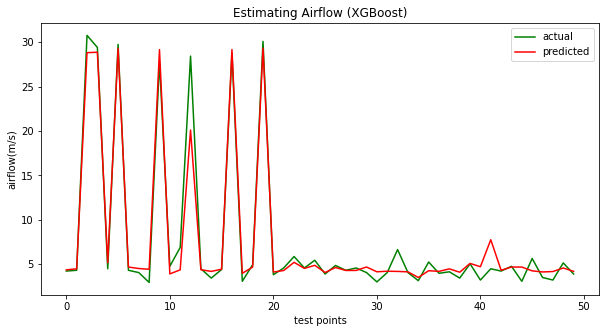

In [567]:
plt.figure(figsize=(10,5))
plt.plot(y_test[50:100], 'g', label="actual")
plt.plot(y_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
plt.savefig("final.png")

Text(0.5, 1.0, 'Estimating Airflow (XGBoost)')

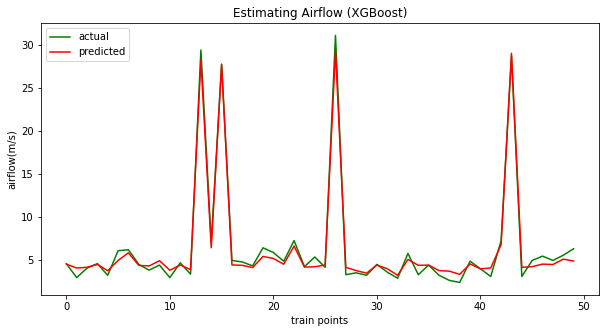

In [568]:
plt.figure(figsize=(10,5))
plt.plot(y_train[50:100], 'g', label="actual")
plt.plot(y_train_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("train points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
# plt.savefig("1m_v1.jpg")



In [569]:
from joblib import dump,load

dump(reg, 'PHONE1flowSense.joblib')

['PHONE1flowSense.joblib']

In [570]:
# from sklearn.metrics import r2_score

# #Looking at predictions from 0m
# data_dir = Path("./SideVent") 
# df10 = pd.read_csv(data_dir / "fft_0_0_SideVent_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df10 = df10[df10['frequency'] != "clocktime"]
# df10 = df10.dropna()
# df10 = convert(df10)
# df = df10[5000:7000]

# data_dir = Path("./1.5m") 
# df9 = pd.read_csv(data_dir / "fft_150_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df9 = df9[df9['frequency'] != "clocktime"]
# df9 = df9.dropna()
# df9 = convert(df9)
# # df = df9[3000:4000]
# #df = np.concatenate([df, df9[2000:3000]], axis=0)




# X = df[:,:-1]
# X = X[:, :9]
# X.shape


# y = df[:, -1]
# y.shape

# y_pred = reg.predict(X)
# print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
# print("Regression Score: ", reg.score(X, y))

# fig1, ax1 = plt.subplots()
# fig1.set_figwidth(15)
# fig1.set_figheight(10)
# fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 0m', fontsize=16)
# l0, = ax1.plot(reg.predict(X), 'g:')
# l1, = ax1.plot(y, 'k-')
# ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
# ax1.set_xlabel("Sample")
# ax1.set_ylabel("Airflow (m/s) predicted/real")
# plt.show()



In [571]:
from sklearn.metrics import r2_score

#Looking at predictions from 0m
data_dir = Path("./SideVent") 
df10 = pd.read_csv(data_dir / "fft_0_0_SideVent_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = df10[df10['frequency'] != "clocktime"]
df10 = df10.dropna()
df = convert(df10)

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :7]
X.shape

y = df[indices, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
    
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 0m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()


ValueError: X has 5 features, but DecisionTreeRegressor is expecting 8 features as input.

Mean Squared Error:  1.0649809872227702
Regression Score:  -0.7761565622767455


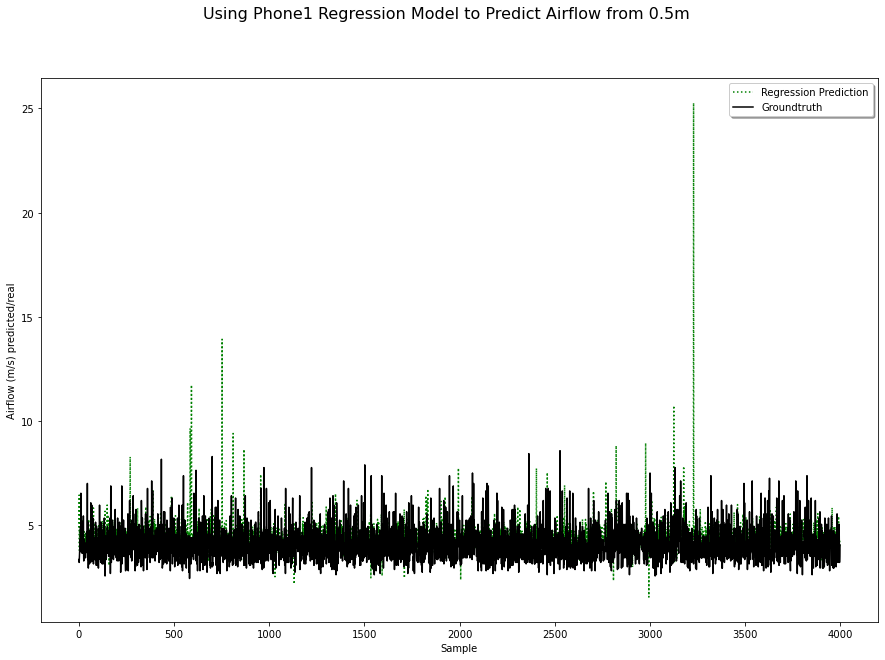

In [573]:
#Looking at predictions from 0.5m
data_dir = Path("./50cm") 
df1 = pd.read_csv(data_dir / "fft_50_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df1 = df1[df1['frequency'] != "clocktime"]
df1 = df1.dropna()
# df36 = df36[:129*198]

df2 = pd.read_csv(data_dir / "fft_50_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = df2[df2['frequency'] != "clocktime"]
df2 = df2.dropna()

df3 = pd.read_csv(data_dir / "fft_50_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = df3[df3['frequency'] != "clocktime"]
df3 = df3.dropna()
df = df1.append([df2, df3])
df = convert(df)

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :8]
X.shape

y = df[indices, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 0.5m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()


Mean Squared Error:  1.7951965654408395
Regression Score:  -0.2549178151596616


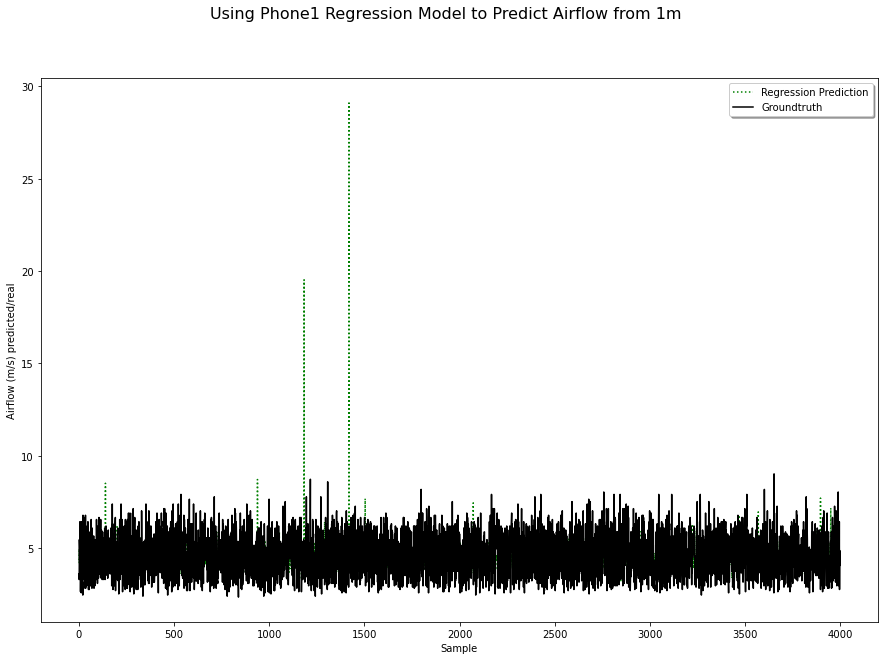

In [574]:
#Looking at predictions from 1m
data_dir = Path("./1m") 
df4 = pd.read_csv(data_dir / "fft_100_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = df4[df4['frequency'] != "clocktime"]
df4 = df4.dropna()

df5 = pd.read_csv(data_dir / "fft_100_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = df5[df5['frequency'] != "clocktime"]
df5 = df5.dropna()

df6 = pd.read_csv(data_dir / "fft_100_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df6 = df6[df6['frequency'] != "clocktime"]
df6 = df6.dropna()
df = df4.append([df5, df6])
df = convert(df)

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :8]
X.shape

y = df[indices, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 1m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

Mean Squared Error:  5.396328351129591
Regression Score:  -8.50680228727451


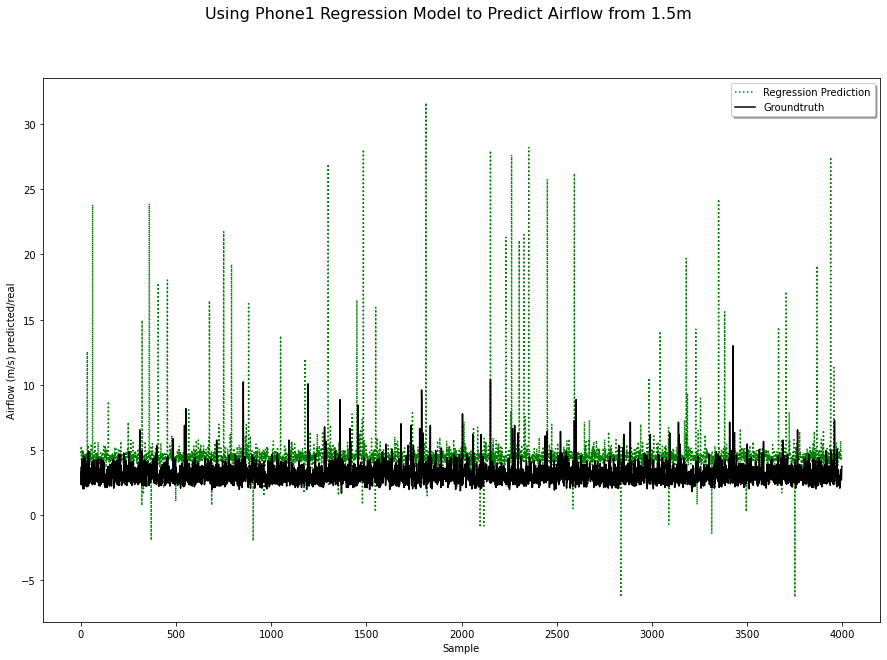

In [575]:
#Looking at predictions from 1.5m
data_dir = Path("./1.5m") 
df7 = pd.read_csv(data_dir / "fft_150_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df7 = df7[df7['frequency'] != "clocktime"]
df7 = df7.dropna()

df8 = pd.read_csv(data_dir / "fft_150_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df8 = df8[df8['frequency'] != "clocktime"]
df8 = df8.dropna()

df9 = pd.read_csv(data_dir / "fft_150_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df9 = df9[df9['frequency'] != "clocktime"]
df9 = df9.dropna()
df = df7.append([df8, df9])
df = convert(df)
df.shape

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :8]
X.shape

y = df[indices, -1]
y.shape
    
y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 1.5m', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

In [ ]:
#Looking at predicting values from Phone 2
df = df11.append([df12, df13, df14, df15])
data_mid = convert(df)
data_mid.shape

indices = np.random.choice(np.arange(data_mid.shape[0]), size=4000, replace=False, p=None)
    
X = data_mid[indices,:-1]
X = X[:, :8]
X.shape

y = data_mid[indices, -1]
y.shape

y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from Phone2 Data', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

Mean Squared Error:  1.709954216902357
Regression Score:  -0.4948877342256779


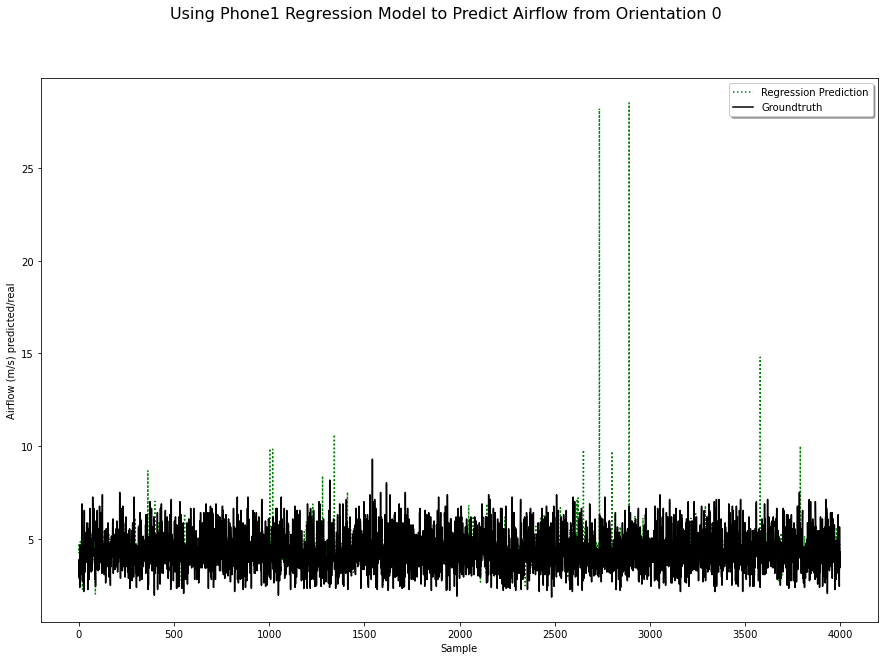

In [576]:
#Looking at predicting values from Orientation 0
df = df1.append([df4, df7])
data_mid = convert(df)
data_mid.shape

indices = np.random.choice(np.arange(data_mid.shape[0]), size=4000, replace=False, p=None)
    
X = data_mid[indices,:-1]
X = X[:, :8]
X.shape

y = data_mid[indices, -1]
y.shape
    
y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from Orientation 0', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

In [ ]:
#Looking at predicting values from Orientation 90
df = df3.append([df6, df9])
data_mid = convert(df)
data_mid.shape

indices = np.random.choice(np.arange(data_mid.shape[0]), size=4000, replace=False, p=None)
    
X = data_mid[indices,:-1]
X = X[:, :8]
X.shape

y = data_mid[indices, -1]
y.shape
    
y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from Orientation 90', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

In [ ]:
#Looking at predicting values from Orientation 180
df = df2.append([df5, df8])
data_mid = convert(df)
data_mid.shape

indices = np.random.choice(np.arange(data_mid.shape[0]), size=4000, replace=False, p=None)
    
X = data_mid[indices,:-1]
X = X[:, :8]
X.shape

y = data_mid[indices, -1]
y.shape


y_pred = reg.predict(X)
print ("Mean Squared Error: ", mean_squared_error(y_pred, y))    
print("Regression Score: ", reg.score(X, y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from Orientation 180', fontsize=16)
l0, = ax1.plot(reg.predict(X), 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()